In [22]:
import  nevis
import numpy as np 
import matplotlib.pyplot as plt
h = nevis.gb()

In [23]:
# the number of different heights > 0
data = h.flatten()
data = data[data > 0]

# Use numpy.unique to get unique values and their counts
unique_values, counts = np.unique(data, return_counts=True)

print(len(unique_values), data.shape[0])


12858 92016194


### Where are the local maxima with the largest b.o.a.?

In [24]:
area = np.load('../res/area-ex-sea.npy')
label = np.load('../res/label.npy')
maxima = np.load('../res/maxima.npy')

In [25]:
# change the maxima to metres that match with the plotting methods
# notice that (x, y) is mapped to (y, x) * 50
maxima_points = maxima.copy()
maxima_points[:, 0] = maxima[:, 1] * 50
maxima_points[:, 1] = maxima[:, 0] * 50

Show the highest 100 local maxima:

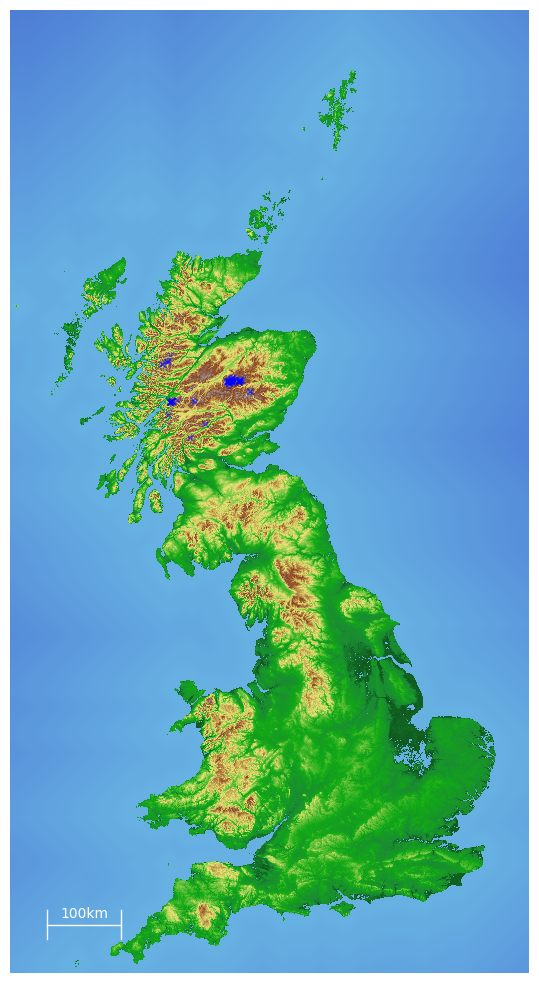

In [26]:
nevis.plot(points=np.array(maxima_points[:100]))
plt.show()

In [27]:
area_argsort = (-area).argsort() # minus so that the larget comes the first
# reorder the maxima by its b.o.a. area excluding sea
maxima_points_area_sorted = maxima_points[area_argsort]
# the correspoinding area for each b.o.a.
area_sorted = area[area_argsort]

Plot the 100 local maxima with the largest b.o.a. area excluding sea:

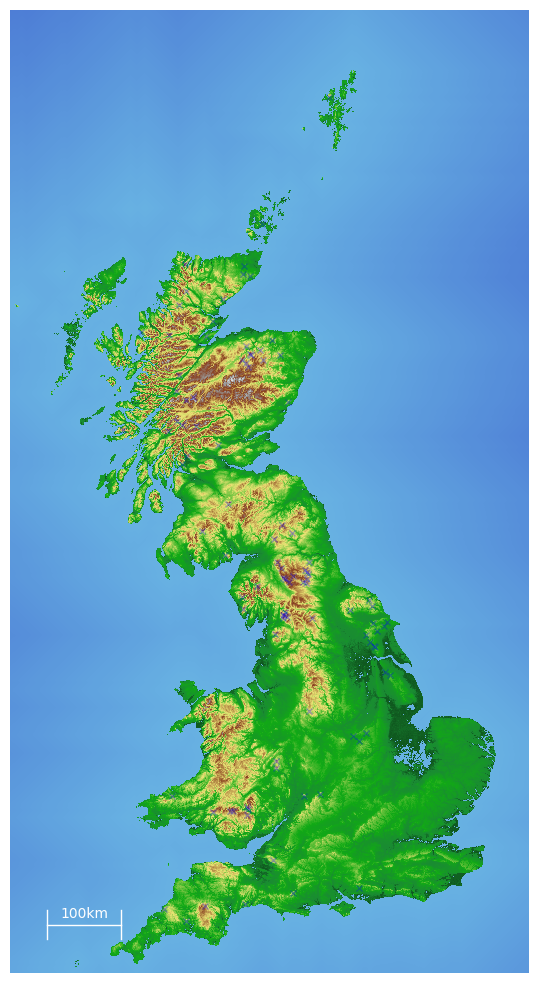

In [28]:
nevis.plot(points=np.array(maxima_points_area_sorted[:100]))
plt.show()

Plot the distribution of the $i$ local maxima with the largest b.o.a. areas, for $i$ in `[3000, 4000, 5000, 10000]`, and generate a `kml` file for each case.

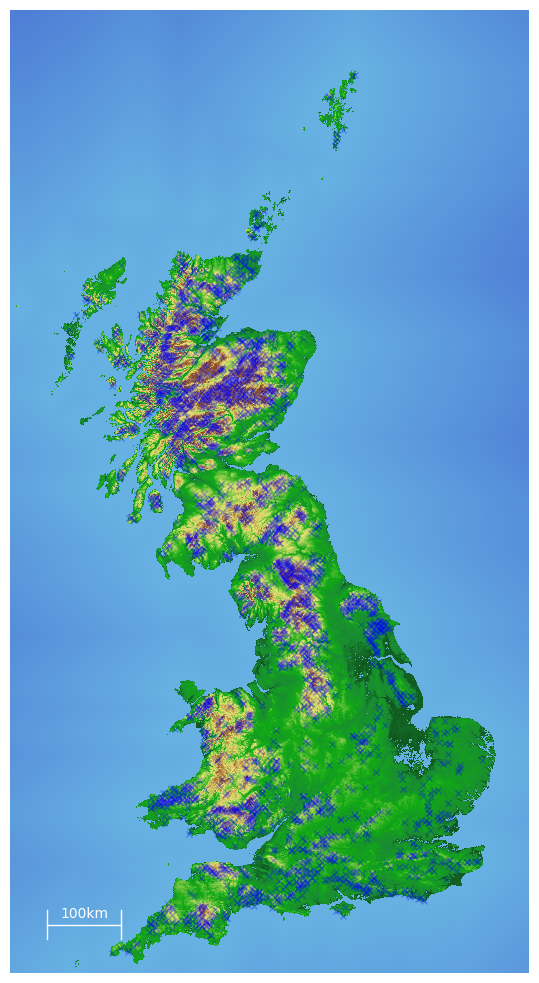

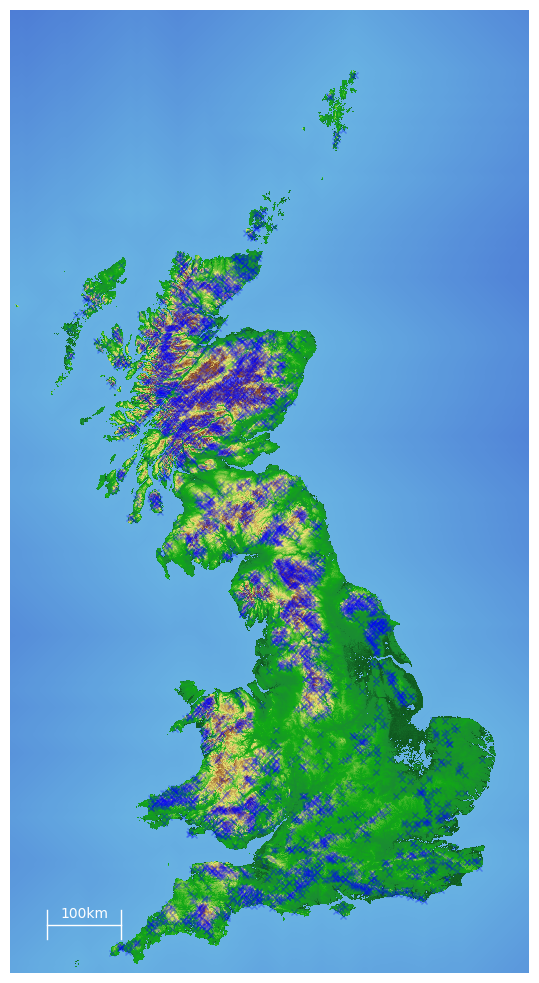

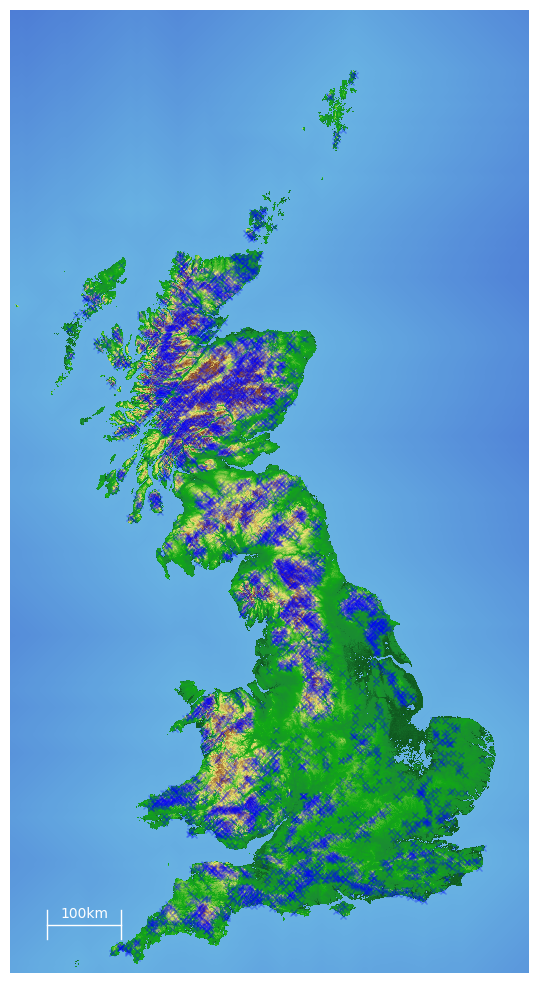

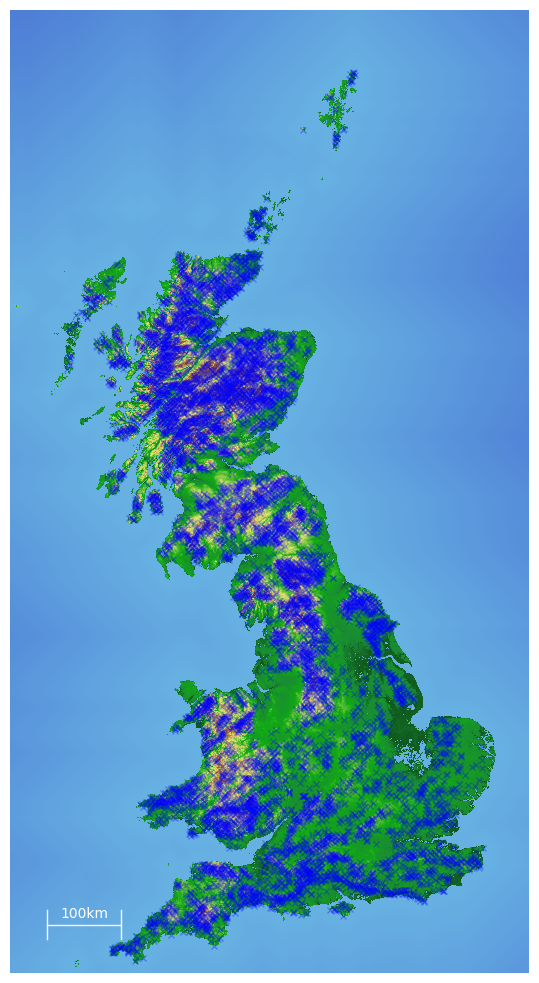

In [29]:
for i in [3000, 4000, 5000, 10000]:
    nevis.generate_kml(f'../res/maxima-{i}.kml', points=list(maxima_points_area_sorted[:i]))
    nevis.plot(points=np.array(maxima_points_area_sorted[:i]))
    plt.show()


Inspect a certain local maximum, e.g. local maximum with the 10-th largest b.o.a. area:

In [30]:
# the area of this b.o.a.
area_sorted[9]

5793

In [31]:
# the coord of the local maximum
maxima_points_area_sorted[9]

array([504600, 469350], dtype=int32)

In [33]:
# save the surroundings to a text file
data = nevis.gb()
y, x = maxima_points_area_sorted[9]
y //= 50
x //= 50
part = data[x - 40 : x + 41, y - 40 : y + 41]
np.savetxt('../res/part-p9.txt', part, fmt='%d')